In [1]:
using Pkg; 
Pkg.activate(".")

"/Users/mcfefa/Dropbox/Papers in Progress/Diversity-Score-Theory-Paper/code/Project.toml"

In [2]:
using DifferentialEquations, Plots;

┌ Info: Recompiling stale cache file /Users/mcfefa/.julia/compiled/v1.0/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1184


In [3]:
using Random, DataFrames, Query; 

In [4]:
using Dates;

## Two Population Game

Exploring (1) Neutral Evolution; (2) Constant Evolution; (3) Frequency-Dependent Evolution that is either (a) positive or (b) negative

PayOff Matrix: 

[  a  b 

   c  d ]

Neutral evolution: a=c, b=d

Constant selection: a=b, c=d

P-FDS: a=b > c=d

N-FDS: a=b < c=d

#### Function Definitions

In [5]:
struct Die
    nsides::Int # number of sides
end

In [6]:
Random.rand(rng::AbstractRNG, d::Random.SamplerTrivial{Die}) = rand(rng, 1:d[].nsides)

In [7]:
function calcqD_2D(freq, q)
    diversity = 0.0; 
    qD = zeros(length(q))
    for i in 1:length(q)
        if q[i] == 1
            #log((freq)^(freq))
            for row in 1:length(freq)[1]
              diversity = diversity .+ log.((freq[row]).^(freq[row]))
            end 
          return diversity = abs(diversity)
        else
            #qD[i] = freq.^q[i] .^ (1 ./ (1 .- q[i]))
            for row in 1:length(freq)[1]
                diversity = diversity .+ (freq[row]).^q
            end
            return diversity = diversity.^(1 ./(1 .- q))
        end    
    end
    
end

calcqD_2D (generic function with 1 method)

In [8]:
function findInflection(q::Array, qD::Array)
    approxLogDeriv = q[2:end].*diff(qD)./diff(q);
    return approxLogDeriv; 
end

findInflection (generic function with 1 method)

In [9]:
function findInflectionLocal(approx::Array)
    return argmin((approx))
end

findInflectionLocal (generic function with 1 method)

In [10]:
function reportInflection(q::Array, qD::Array)
    diffVector = findInflection(q, qD)
    inflectPt = findInflectionLocal(diffVector)
    slopeInflectPt = abs(diffVector[inflectPt])
    qInflecPt = q[inflectPt+1]
    return (qInflecPt, slopeInflectPt)
end

reportInflection (generic function with 1 method)

#### Neutral Evolution

In [595]:
a = 3
b = 1
c = a 
d = b

payOffMtx = [ a   b;
              c   d]

fNS(u,p,t) = u * (1-u) * (payOffMtx[1,1]*u + payOffMtx[1,2]*(1-u) - (payOffMtx[2,1]*u + payOffMtx[2,2]*(1-u)))  

xdotNS(u) = u .* (1 .-u) .* (payOffMtx[1,1].*u .+ payOffMtx[1,2].*(1 .-u) 
    .- (payOffMtx[2,1].*u .+ payOffMtx[2,2].*(1 .-u)))  

xdotNS (generic function with 1 method)

In [596]:
uNS = collect(0:0.01:1);
fNSv = xdotNS(uNS);
fNSv2 = -1 .* fNSv;

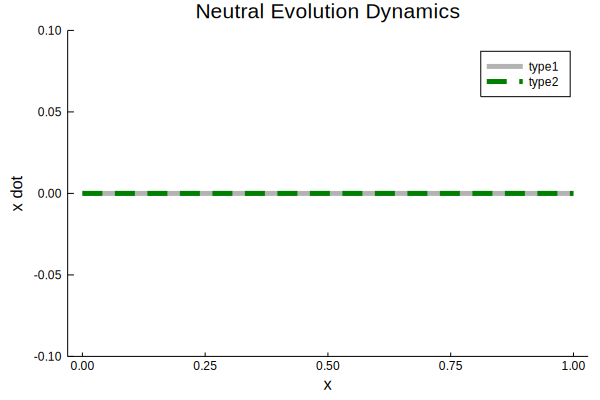

In [597]:
pNS = plot(uNS, fNSv,linewidth=5,title="Neutral Evolution Dynamics",
     xaxis="x",yaxis="x dot",label="type1",color=:black, opacity=0.3)
plot!(pNS, uNS,fNSv2,linewidth=5,ls=:dash,color=:green,label="type2",grid=false, ylims=(-0.1,0.1))

In [598]:
savefig(pNS, string("./results/EGT/Neutral-Evolution_FreqDynamics_x-vs-x-dot_",Dates.today(),".pdf"))

In [599]:
u0NS = 0.25;
tspanNS = (0, 10.0);
probNS = ODEProblem(fNS,u0NS,tspanNS)
solNS = solve(probNS,reltol=1e-6,saveat=0.01); 
type1NS = solNS.u
type2NS =  1 .- type1NS;

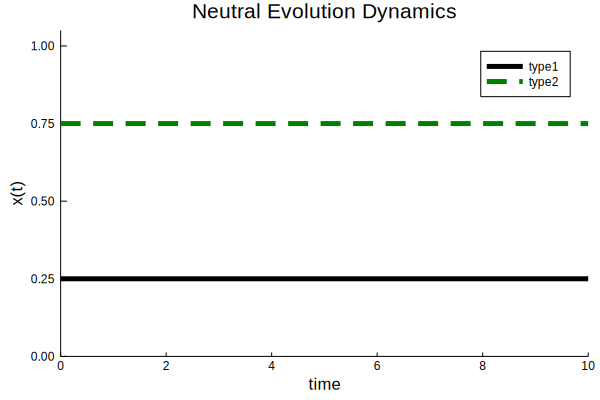

In [600]:
p = plot(solNS,linewidth=5,title="Neutral Evolution Dynamics",
     xaxis="time",yaxis="x(t)",label="type1",color=:black)
plot!(p, solNS.t,type2NS,linewidth=5,ls=:dash,color=:green,label="type2",grid=false, ylims=(0,1.05))

In [601]:
savefig(p, string("./results/EGT/Neutral-Evolution_FreqDynamics_overTime_",Dates.today(),".pdf"))

#### Constant Evolution

In [602]:
a = 3
b = a
c = 1
d = c

payOffMtx = [ a   b;
              c   d]

fCS(u,p,t) = u * (1-u) * (payOffMtx[1,2] - payOffMtx[2,2])  

xdotCS(u) = u .* (1 .-u) .* (payOffMtx[1,2] .- payOffMtx[2,2])  

xdotCS (generic function with 1 method)

In [603]:
uCS = collect(0:0.01:1);
fCSv = xdotNS(uCS);
fCSv2 = -1 .* fCSv;

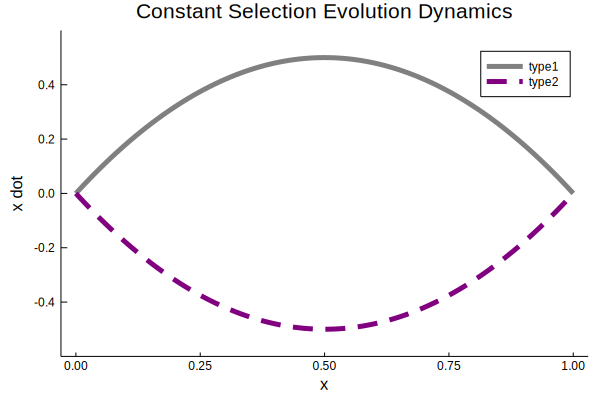

In [606]:
pCS = plot(uCS, fCSv,linewidth=5,title="Constant Selection Evolution Dynamics",
     xaxis="x",yaxis="x dot",label="type1",color=:gray)
plot!(pCS, uCS,fCSv2,linewidth=5,ls=:dash,color=:purple,label="type2",grid=false, ylims=(-0.6,0.6))

In [607]:
savefig(pCS, string("./results/EGT/Constant-Selection-Evolution_FreqDynamics_x-vs-x-dot_",Dates.today(),".pdf"))

In [608]:
u0CS = 0.1;
tspanCS = (0, 10.0);
probCS = ODEProblem(fCS,u0CS,tspanCS)
solCS = solve(probCS,reltol=1e-6,saveat=0.01); 
type1CS = solCS.u
type2CS =  1 .- type1CS;

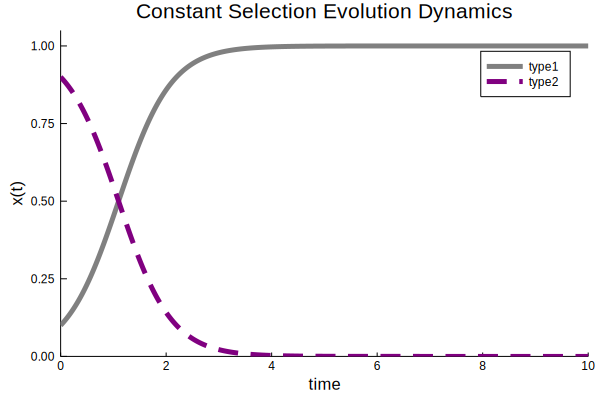

In [609]:
p = plot(solCS,linewidth=5,title="Constant Selection Evolution Dynamics",
     xaxis="time",yaxis="x(t)",label="type1",color=:gray)
plot!(p, solCS.t,type2CS,linewidth=5,ls=:dash,color=:purple,label="type2", grid=false,ylims=(0,1.05))

In [610]:
savefig(p, string("./results/EGT/Constant-Selection-Evolution_FreqDynamics_overTime_",Dates.today(),".pdf"))

#### Bistability
Positive Frequency Dependent Selection (P-FDS) --> not exactly write, switching nomenclature

In [701]:
a = 2
b = 2 #a # 1
c = 1 
d = 3 #c #0.5 

payOffMtx = [ a   b;
              c   d]

2×2 Array{Int64,2}:
 2  2
 1  3

In [702]:
## Define differential equation for x dot
f(u,p,t) = u * (1-u) * (payOffMtx[1,1]*u + payOffMtx[1,2]*(1-u) - (payOffMtx[2,1]*u + payOffMtx[2,2]*(1-u)))  

f (generic function with 1 method)

In [703]:
xdot(u) = u .* (1 .-u) .* (payOffMtx[1,1].*u .+ payOffMtx[1,2].*(1 .-u) 
    .- (payOffMtx[2,1].*u .+ payOffMtx[2,2].*(1 .-u)))  

xdot (generic function with 1 method)

In [704]:
uvect = collect(0:0.01:1);
fvect = xdot(uvect);
vect2 = -1 .* fvect; # x' + y' = 0 (since x+y=1), so y' = -x'

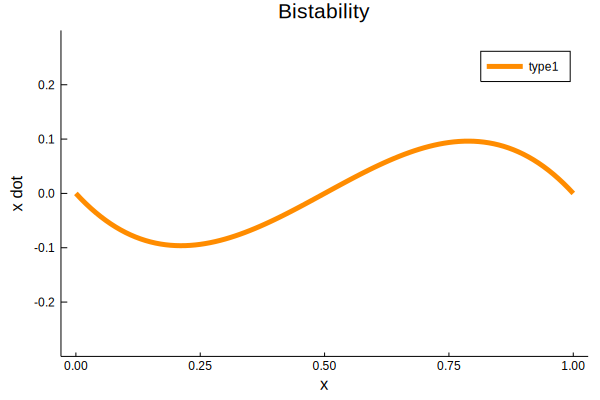

In [706]:
p = plot(uvect, fvect,linewidth=5,title="Bistability",
     xaxis="x",yaxis="x dot",label="type1",color="DarkOrange")
plot!(p, linewidth=5,ls=:dash,color=:blue,label="type2",grid=false, ylims=(-0.3,0.3)) # uvect,vect2,

In [707]:
savefig(p, string("./results/EGT/Bistability_FreqDynamics_x-vs-xdot_",Dates.today(),".pdf"))

In [728]:
u0 = 0.6;
tspan = (0, 10.0);

In [729]:
prob = ODEProblem(f,u0,tspan)
sol = solve(prob,reltol=1e-6,saveat=0.01); 

In [730]:
type1 = sol.u
type2 =  1 .- type1;

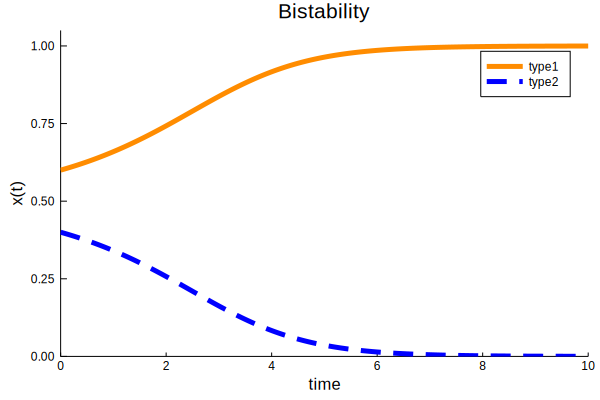

In [731]:
p = plot(sol,linewidth=5,title="Bistability",
     xaxis="time",yaxis="x(t)",label="type1",color="DarkOrange")
plot!(p, sol.t,type2,linewidth=5,ls=:dash,color=:blue,grid=false,label="type2", ylims=(0,1.05))

In [732]:
savefig(p, string("./results/EGT/Bistability_FreqDynamics_overTime_",Dates.today(),".pdf"))

In [733]:
q = exp10.(range(-2.0, stop=2.0, length=100));

In [754]:
divMetrics_HD = DataFrame()
cn = ["timePt","LowQ", "HighQ", "IPq", "IPslope"];
for c in cn
    divMetrics_HD[Symbol(c)] = 0.0
end
divMetrics_HD = divMetrics_HD[2:end,:]

┌ Warning: Implicit broadcasting to a new column in DataFrame assignment is deprecated.Use `df[!, col_ind] = [v]` when `df` has zero columns
│   caller = top-level scope at In[754]:4
└ @ Core ./In[754]:4


,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64


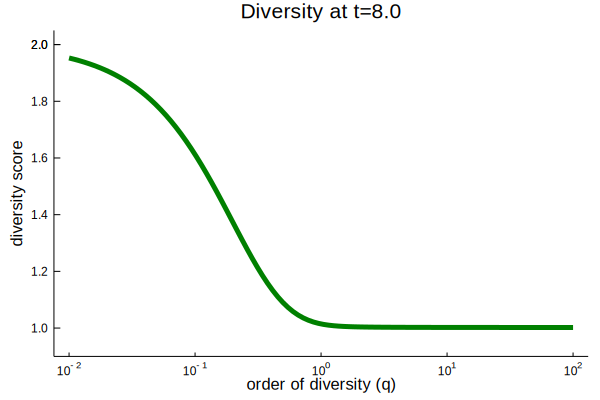

In [755]:
loc = rand(Die(length(type1)))
loc = 801
df = DataFrame(species=["type1","type2"], freq=[type1[loc],type2[loc]])
pfds_div = calcqD_2D(transpose(df[:,2]),q);
p1 = plot(q,pfds_div, linewidth=5, ylims=(0.9,2.05), grid=false,color=:green, legend=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")


In [756]:
savefig(p1, string("./results/EGT/Bistability_DiversityCurve_at-t-8_",Dates.today(),".pdf"))

In [757]:
pfds_IP_q, pfds_IP_slope = reportInflection(q,pfds_div)
tmpdf = [sol.t[loc],pfds_div[1],pfds_div[end],pfds_IP_q, pfds_IP_slope]
push!(divMetrics_HD,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,8.0,1.95275,1.00202,0.215443,0.386512


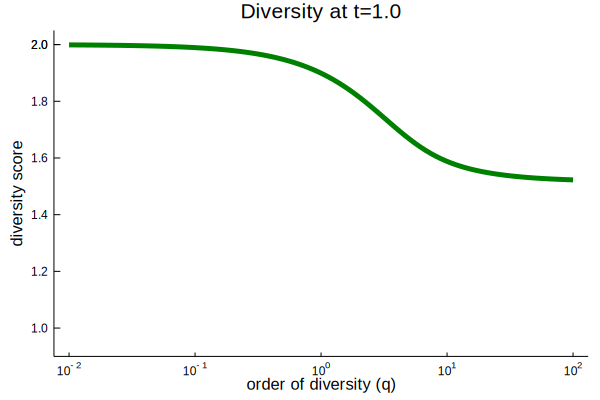

In [758]:
loc = 101
df = DataFrame(species=["type1","type2"], freq=[type1[loc],type2[loc]])
pfds_div = calcqD_2D(transpose(df[:,2]),q);
p2 = plot(q,pfds_div, linewidth=5, color=:green,ylims=(0.9,2.05), grid=false,legend=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")

In [759]:
savefig(p2, string("./results/EGT/Bistability_DiversityCurve_at-t-1.0_",Dates.today(),".pdf"))

In [760]:
pfds_IP_q, pfds_IP_slope = reportInflection(q,pfds_div)
tmpdf = [sol.t[loc],pfds_div[1],pfds_div[end],pfds_IP_q, pfds_IP_slope]
push!(divMetrics_HD,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,8.0,1.95275,1.00202,0.215443,0.386512
2,1.0,1.99893,1.52273,3.51119,0.175618


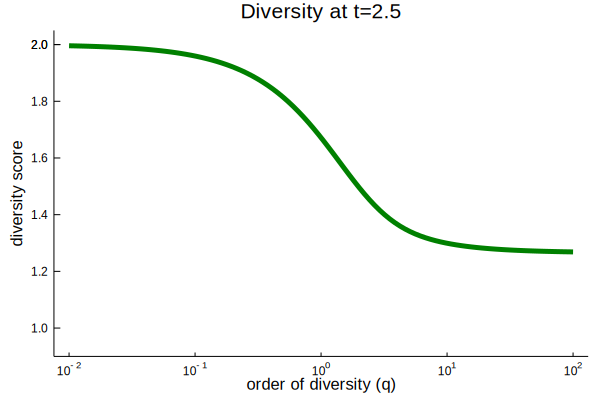

In [761]:
loc = 251
df = DataFrame(species=["type1","type2"], freq=[type1[loc],type2[loc]])
pfds_div = calcqD_2D(transpose(df[:,2]),q);
p3 = plot(q,pfds_div, linewidth=5, color=:green,ylims=(0.9,2.05), grid=false,legend=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")

In [762]:
savefig(p3, string("./results/EGT/Bistability_DiversityCurve_at-t-2.5_",Dates.today(),".pdf"))

In [763]:
pfds_IP_q, pfds_IP_slope = reportInflection(q,pfds_div)
tmpdf = [sol.t[loc],pfds_div[1],pfds_div[end],pfds_IP_q, pfds_IP_slope]
push!(divMetrics_HD,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,8.0,1.95275,1.00202,0.215443,0.386512
2,1.0,1.99893,1.52273,3.51119,0.175618
3,2.5,1.9959,1.26863,1.51991,0.270891


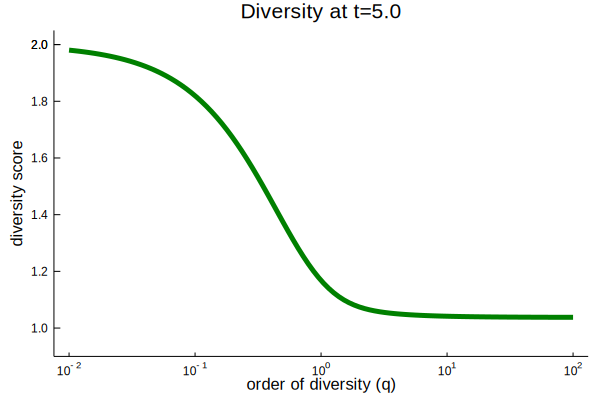

In [764]:
loc = 501
df = DataFrame(species=["type1","type2"], freq=[type1[loc],type2[loc]])
pfds_div = calcqD_2D(transpose(df[:,2]),q);
p4 = plot(q,pfds_div, linewidth=5, ylims=(0.9,2.05),color=:green,grid=false, legend=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")

In [765]:
savefig(p4, string("./results/EGT/Bistability_DiversityCurve_at-t-5_",Dates.today(),".pdf"))

In [766]:
pfds_IP_q, pfds_IP_slope = reportInflection(q,pfds_div)
tmpdf = [sol.t[loc],pfds_div[1],pfds_div[end],pfds_IP_q, pfds_IP_slope]
push!(divMetrics_HD,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,8.0,1.95275,1.00202,0.215443,0.386512
2,1.0,1.99893,1.52273,3.51119,0.175618
3,2.5,1.9959,1.26863,1.51991,0.270891
4,5.0,1.98045,1.03784,0.453488,0.366416


#### Negative-Frequency Dependent Selection (N-FDS)
Can achieve coexistence

In [747]:
a = -0.625 #2
b = -0.25  #a
c = -0.125 #4
d = -0.5 #c

payOffMtxNFDS = [ a   b;
              c   d]

2×2 Array{Float64,2}:
 -0.625  -0.25
 -0.125  -0.5 

In [748]:
## Define dynamics
fNFDS(u,p,t) = u * (1-u) * (payOffMtxNFDS[1,1]*u + payOffMtxNFDS[1,2]*(1-u) 
    - (payOffMtxNFDS[2,1]*u + payOffMtxNFDS[2,2]*(1-u)))

fNFDS (generic function with 1 method)

In [749]:
uvect=collect(0:0.01:1)
xdotNFDS(u) = u .* (1 .-u) .* (payOffMtxNFDS[1,1].*u .+ payOffMtxNFDS[1,2].*(1 .-u) 
    .- (payOffMtxNFDS[2,1].*u .+ payOffMtxNFDS[2,2].*(1 .-u)))  
fvectNFDS = xdotNFDS(uvect)
fvect2NFDS = -1 .* fvectNFDS;

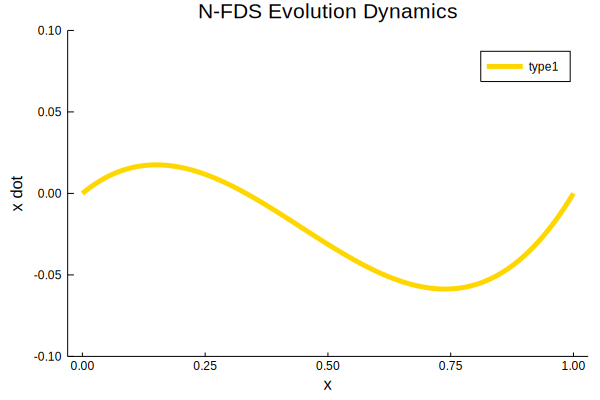

In [750]:
p = plot(uvect, fvectNFDS,linewidth=5,title="N-FDS Evolution Dynamics",
     xaxis="x",yaxis="x dot",label="type1",color=:gold)
plot!(p, linewidth=5,ls=:dash,color=:navy,grid=false,label="type2", ylims=(-0.1,0.1)) # uvect,fvect2NFDS,

In [751]:
savefig(p, string("./results/EGT/N-FDS-Evolution_FreqDynamics_x-vs-xdot_",Dates.today(),".pdf"))

In [627]:
u0 = 0.1;
tspan = (0, 60.0);

In [628]:
probNFDS = ODEProblem(fNFDS,u0,tspan)
solNFDS = solve(probNFDS,reltol=1e-6,saveat=0.01); 

In [629]:
ntype1 = solNFDS.u
ntype2 =  1 .- ntype1;

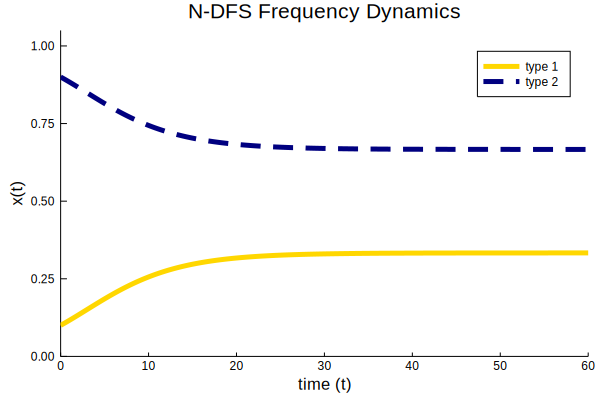

In [630]:
pSH = plot(solNFDS,linewidth=5,title="N-DFS Frequency Dynamics",
     xaxis="time (t)",yaxis="x(t)",label="type 1",color=:gold)
plot!(pSH, solNFDS.t,ntype2,linewidth=5,ls=:dash,color=:navy,grid=false,label="type 2", ylims=(0,1.05))

In [631]:
savefig(pSH, string("./results/EGT/N-FDS-Evolution_FreqDynamics_overTime_",Dates.today(),".pdf"))

In [632]:
divMetrics_SH = DataFrame()
cnSH = ["timePt","LowQ", "HighQ", "IPq", "IPslope"];
for c in cnSH
    divMetrics_SH[Symbol(c)] = 0.0
end
divMetrics_SH = divMetrics_SH[2:end,:]

┌ Warning: Implicit broadcasting to a new column in DataFrame assignment is deprecated.Use `df[!, col_ind] = [v]` when `df` has zero columns
│   caller = top-level scope at In[632]:4
└ @ Core ./In[632]:4


,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64


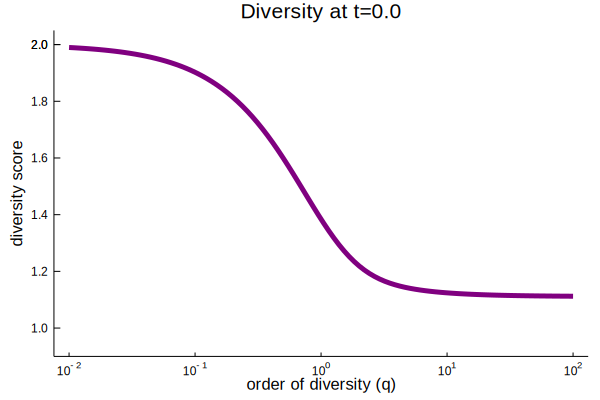

In [633]:
loc = 1
dfSH = DataFrame(species=["ntype1","ntype2"], freq=[ntype1[loc],ntype2[loc]])
nfds_div = calcqD_2D(transpose(dfSH[:,2]),q);
pSH1 = plot(q,nfds_div, linewidth=5, ylims=(0.90,2.05), color=:purple, grid=false,legend=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")


In [634]:
savefig(pSH1, string("./results/EGT/N-FDS-Evolution_DiversityCurve_at-t-0_",Dates.today(),".pdf"))

In [635]:
nfds_IP_q, nfds_IP_slope = reportInflection(q,nfds_div)
tmpdf = [sol.t[loc],nfds_div[1],nfds_div[end],nfds_IP_q, nfds_IP_slope]
push!(divMetrics_SH,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,0.0,1.98983,1.11229,0.792483,0.333263


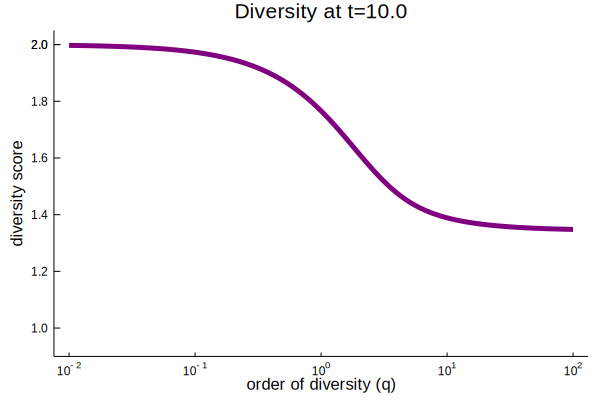

In [636]:
loc = 1001
dfSH = DataFrame(species=["ntype1","ntype2"], freq=[ntype1[loc],ntype2[loc]])
nfds_div = calcqD_2D(transpose(dfSH[:,2]),q);
pSH2 = plot(q,nfds_div, linewidth=5, ylims=(0.9,2.05), color=:purple, grid=false,legend=false, title = string("Diversity at t=",solNFDS.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")


In [637]:
savefig(pSH2, string("./results/EGT/N-FDS-Evolution_DiversityCurve_at-t-10_",Dates.today(),".pdf"))

In [638]:
nfds_IP_q, nfds_IP_slope = reportInflection(q,nfds_div)
tmpdf = [sol.t[loc],nfds_div[1],nfds_div[end],nfds_IP_q, nfds_IP_slope]
push!(divMetrics_SH,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,0.0,1.98983,1.11229,0.792483,0.333263
2,10.0,1.99728,1.348,2.00923,0.2405


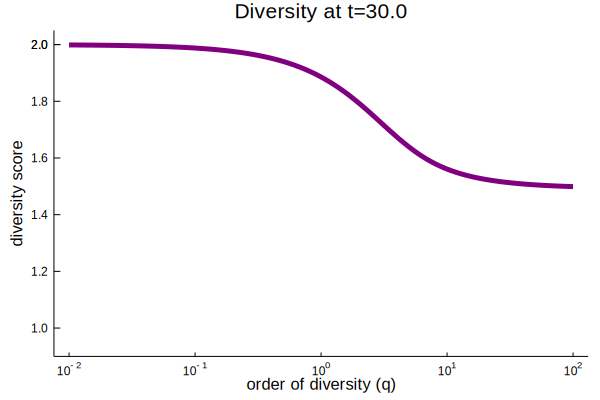

In [639]:
loc = 3001
dfSH = DataFrame(species=["ntype1","ntype2"], freq=[ntype1[loc],ntype2[loc]])
nfds_div = calcqD_2D(transpose(dfSH[:,2]),q);
pSH3 = plot(q,nfds_div, linewidth=5, color=:purple, ylims=(0.9,2.05),legend=false,grid=false, title = string("Diversity at t=",solNFDS.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")

In [640]:
savefig(pSH3, string("./results/EGT/N-FDS-Evolution_DiversityCurve_at-t-30_",Dates.today(),".pdf"))

In [641]:
nfds_IP_q, nfds_IP_slope = reportInflection(q,nfds_div)
tmpdf = [solNFDS.t[loc],nfds_div[1],nfds_div[end],nfds_IP_q, nfds_IP_slope]
push!(divMetrics_SH,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,0.0,1.98983,1.11229,0.792483,0.333263
2,10.0,1.99728,1.348,2.00923,0.2405
3,30.0,1.99877,1.49898,3.19927,0.184422


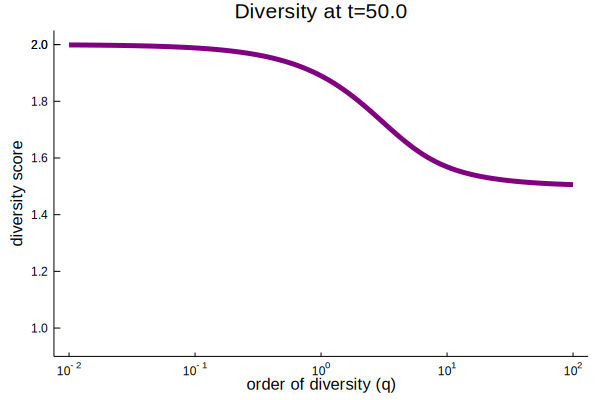

In [642]:
loc = 5001
dfSH = DataFrame(species=["ntype1","ntype2"], freq=[ntype1[loc],ntype2[loc]])
nfds_div = calcqD_2D(transpose(dfSH[:,2]),q);
pSH3 = plot(q,nfds_div, linewidth=5, color=:purple, ylims=(0.9,2.05),legend=false,grid=false, title = string("Diversity at t=",solNFDS.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")

In [643]:
savefig(pSH3, string("./results/EGT/N-FDS-Evolution_DiversityCurve_at-t-50_",Dates.today(),".pdf"))

In [644]:
nfds_IP_q, nfds_IP_slope = reportInflection(q,nfds_div)
tmpdf = [solNFDS.t[loc],nfds_div[1],nfds_div[end],nfds_IP_q, nfds_IP_slope]
push!(divMetrics_SH,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,0.0,1.98983,1.11229,0.792483,0.333263
2,10.0,1.99728,1.348,2.00923,0.2405
3,30.0,1.99877,1.49898,3.19927,0.184422
4,50.0,1.99882,1.5059,3.19927,0.181899
